In [1]:
import transfer
from community import *
import  matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import numpy as np
from datetime import datetime

# There is an option to set a file-name -- would highly recommend doing that.
date_time = datetime.now().strftime("%m_%d_%Y_%H:%M:%S")


In [107]:
""" simulate returns an animated 3d scatter plot of the community allIdeas object.
The input parameters are the community, the interaction coefficient gamma, 
and also fn, a string file-name which defaults to date and time."""
def simulate(c=None, gamma = 0.005, T = 80,fn=date_time):
    # seems like the same community is used again and again if I do not specify None case below.
    if c is None:
        c = community(300,3)
    fps = 40

    # Data to store c.allIdeas, to then make animation
    dataX = np.zeros((T*fps,c.numberMembers))
    dataY = np.zeros((T*fps,c.numberMembers))
    dataZ = np.zeros((T*fps,c.numberMembers))
    
    posX = np.zeros((T*fps,c.numberMembers))
    posY = np.zeros((T*fps,c.numberMembers))

    # Iterate the idea transfer throughout community
    for t in range(0,T+1):
        np.random.seed()
        dataX[t,:] = c.allIdeas[:,0]
        dataY[t,:] = c.allIdeas[:,1]
        dataZ[t,:] = c.allIdeas[:,2]
        
        posX[t,:] = c.allPositions[:,0]
        posY[t,:] = c.allPositions[:,1]
        #transfer.deterministicMerge(c, gamma/(t+1)**0.5)
        transfer.probabilisticMerge(c, gamma,t)

    # Plot results
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121,projection='3d')
    ax1.scatter3D(dataX[0], dataY[0], dataZ[0])

    ax1Ticks = np.linspace(-c.domainSize,c.domainSize,5)
    ax1bounds = (-c.domainSize,c.domainSize)
    
    ax2 = fig.add_subplot(122)
    ax2Ticks = np.linspace(-2*c.getPositionBounds(),2*c.getPositionBounds(),4)  
    ax2bounds = (-2*c.getPositionBounds(),2*c.getPositionBounds())
    
    #animation function for animation.FuncAnimation
    def update(ifrm,dataX,dataY,dataZ,posX,posY):
        ax1.clear()
        ax1.set_xticks(ax1Ticks)
        ax1.set_yticks(ax1Ticks)
        ax1.set_zticks(ax1Ticks)
        ax1.set(xlim=ax1bounds,ylim=ax1bounds,zlim=ax1bounds)
        ax1.scatter3D(dataX[ifrm], dataY[ifrm], dataZ[ifrm])
        ax1.set_xlabel("frame: %d" % (ifrm))
        
        ax2.clear()
        ax2.set_xticks(ax2Ticks)
        ax2.set_yticks(ax2Ticks)
        ax2.set(xlim = ax2bounds, ylim = ax2bounds)
        ax2.scatter(posX[ifrm],posY[ifrm],s=1000*c.allRadii**2,alpha=0.08)
        ax2.set_xlabel("frame: %d" % (ifrm))

    ani = animation.FuncAnimation(fig, update, T, fargs=(dataX,dataY,dataZ,posX,posY),interval = T/fps )
    ani.save(fn+'.gif',writer='imagemagick',fps=fps)

    #plt.show()


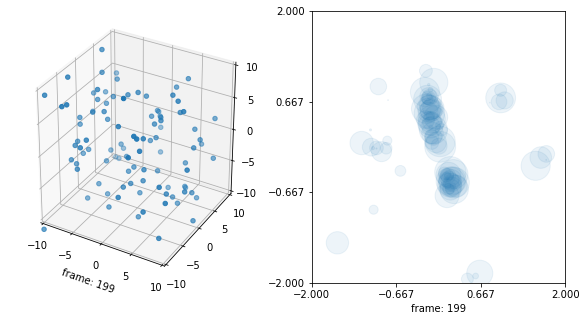

In [108]:
c = community(numberMembers=100,numberIdeas=3,domainSize=10)
simulate(c,gamma=0.05,T=200)

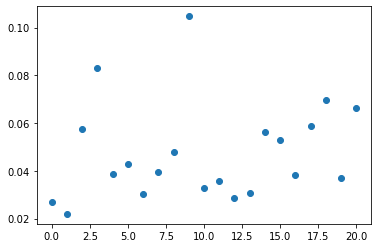

In [109]:
plt.plot(c.ideaDistribution[0][0],'o')
plt.show()

In [110]:
from scipy import cluster
centroids,loss = cluster.vq.kmeans(c.allPositions,4)
centroids

array([[-0.98595258, -0.19858302],
       [ 0.22468242, -0.62532852],
       [ 1.26036838,  0.48512951],
       [-0.16605088,  0.51313796]])

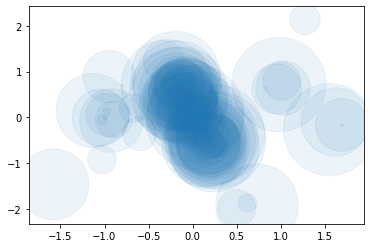

In [111]:
plt.scatter(c.allPositions[:,0],c.allPositions[:,1],s=10000*c.allRadii**2,alpha=0.08)

In [112]:
def closest_centroids(points,centroids):
    distances = np.sqrt(((points - centroids[:,np.newaxis])**2).sum(axis=2))
    return np.argmin(distances,axis=0)

In [113]:
idea0 = c.allIdeas[closest_centroids(c.allPositions, centroids)==3]

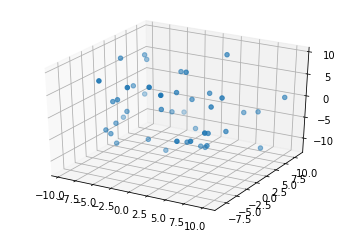

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(idea0[:,0],idea0[:,1],idea0[:,2])
plt.show()

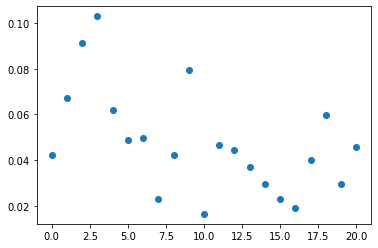

In [115]:
plt.plot(c.ideaDistribution[closest_centroids(c.allPositions, centroids)==3][1][0][:],'o')